# Feature Engineering

In [1]:
import sys
import os
sys.path.append('../scripts')

from data_loader import *
from feature_engineering import *
from eda import *

## Load Dataset

In [2]:
# path to the CSV file
filename = 'cleaned_df.parquet'
path = os.path.join('..', 'data/processed', filename)

# Load dataset
cleaned_df = load_data(path)
cleaned_df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13 09:54:09+00:00,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13 09:54:25+00:00,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13 09:54:35+00:00,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13 10:01:10+00:00,2,0


## Aggregated  (RFMS) & Time Features

### RFMS Features:

##### Recency(R): Time since a customer's last purchase or transaction.

##### Frequency(F): Number of purchases or transactions a customer has made.

##### Monetary(M): Total amount of money a customer has spent with the business.

##### Standard Deviation(S): Variability or dispersion of a customer's purchase amounts.

In [3]:
aggregated_df = create_aggregate_features(cleaned_df)
aggregated_df.head()

,CustomerId,Recency,Frequency,Monetary,MeanAmount,StdAmount,AvgTransactionHour,AvgTransactionDay,AvgTransactionMonth,AvgTransactionYear
2,CustomerId_1001,89,5,20000.0,4000.000000,6558.963333,7.800000,16.000000,11.000000,2018.000000
3,CustomerId_1002,25,11,4225.0,384.090909,560.498966,13.454545,14.727273,8.636364,2018.272727
4,CustomerId_1003,11,6,20000.0,3333.333333,6030.478146,14.333333,1.000000,2.000000,2019.000000
6,CustomerId_1005,46,9,48800.0,5422.222222,5983.681513,10.111111,28.000000,12.000000,2018.000000
9,CustomerId_1008,65,2,20000.0,10000.000000,0.000000,13.000000,9.000000,12.000000,2018.000000


In [4]:
aggregated_df.isna().sum()

CustomerId             0
Recency                0
Frequency              0
Monetary               0
MeanAmount             0
StdAmount              0
AvgTransactionHour     0
AvgTransactionDay      0
AvgTransactionMonth    0
AvgTransactionYear     0
dtype: int64

## Encode Categorical Variables

In [5]:
encoded_df = encode_categorical_variables(aggregated_df)
encoded_df.head()

,CustomerId,Recency,Frequency,Monetary,MeanAmount,StdAmount,AvgTransactionHour,AvgTransactionDay,AvgTransactionMonth,AvgTransactionYear
2,0,89,5,20000.0,4000.000000,6558.963333,7.800000,16.000000,11.000000,2018.000000
3,1,25,11,4225.0,384.090909,560.498966,13.454545,14.727273,8.636364,2018.272727
4,2,11,6,20000.0,3333.333333,6030.478146,14.333333,1.000000,2.000000,2019.000000
6,3,46,9,48800.0,5422.222222,5983.681513,10.111111,28.000000,12.000000,2018.000000
9,4,65,2,20000.0,10000.000000,0.000000,13.000000,9.000000,12.000000,2018.000000


## Visualizing Transactions in the RFMS space
#### To establish a boundary where users are classified as high and low RFMS scores.

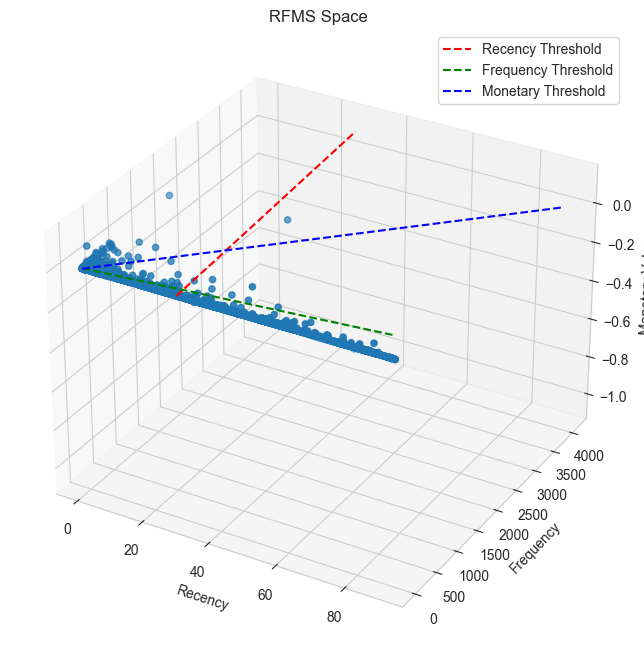

In [6]:
r_threshold, f_threshold, m_threshold = visualize_rfms_space(encoded_df)

In [7]:
r_threshold

28.0

In [8]:
f_threshold

10.0

In [9]:
m_threshold

30000.0

## Classifiy users based on RFM Thresholds

In [10]:
classified_df = classify_users_by_rfms(encoded_df, r_threshold, f_threshold, m_threshold )
classified_df

,CustomerId,Recency,Frequency,Monetary,MeanAmount,StdAmount,AvgTransactionHour,AvgTransactionDay,AvgTransactionMonth,AvgTransactionYear,Classification,is_high_risk
2,0,89,5,20000.0,4000.000000,6558.963333,7.800000,16.000000,11.000000,2018.000000,High-risk,1
3,1,25,11,4225.0,384.090909,560.498966,13.454545,14.727273,8.636364,2018.272727,High-risk,1
4,2,11,6,20000.0,3333.333333,6030.478146,14.333333,1.000000,2.000000,2019.000000,High-risk,1
6,3,46,9,48800.0,5422.222222,5983.681513,10.111111,28.000000,12.000000,2018.000000,High-risk,1
9,4,65,2,20000.0,10000.000000,0.000000,13.000000,9.000000,12.000000,2018.000000,High-risk,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3718,3016,4,6,20000.0,3333.333333,6088.240030,10.000000,8.000000,2.000000,2019.000000,High-risk,1
3719,3017,25,5,20000.0,4000.000000,6745.368782,15.000000,18.000000,1.000000,2019.000000,High-risk,1
3720,3018,0,101,543873.0,5384.881188,14800.656784,13.900990,18.475248,5.207921,2018.623762,Low-risk,0
3721,3019,67,17,139000.0,8176.470588,4433.329648,14.470588,7.000000,12.000000,2018.000000,High-risk,1


### Low-risk vs High-risk users distribution

In [11]:
(classified_df['Classification']=='High-risk').sum()

2020

In [12]:
(classified_df['Classification']=='Low-risk').sum()

1001

In [13]:
classified_df.columns

Index(['CustomerId', 'Recency', 'Frequency', 'Monetary', 'MeanAmount',
       'StdAmount', 'AvgTransactionHour', 'AvgTransactionDay',
       'AvgTransactionMonth', 'AvgTransactionYear', 'Classification',
       'is_high_risk'],
      dtype='object')

## Perform Weight of Evidence (WoE) binning 

In [14]:
filtered_df = classified_df.drop(['Classification'], axis=1)
features_to_bin = ['Recency', 'Frequency', 'Monetary', 'MeanAmount',
       'StdAmount', 'AvgTransactionHour', 'AvgTransactionDay',
       'AvgTransactionMonth']
target = 'is_high_risk'


df_with_woe = calculate_woe_and_bin_features(filtered_df, features_to_bin, target)
df_with_woe

,CustomerId,Recency,Frequency,Monetary,MeanAmount,StdAmount,AvgTransactionHour,AvgTransactionDay,AvgTransactionMonth,AvgTransactionYear,is_high_risk,Recency_binned_WoE,Frequency_binned_WoE,Monetary_binned_WoE,MeanAmount_binned_WoE,StdAmount_binned_WoE,AvgTransactionHour_binned_WoE,AvgTransactionDay_binned_WoE,AvgTransactionMonth_binned_WoE
2,0,89,5,20000.0,4000.000000,6558.963333,7.800000,16.000000,11.000000,2018.000000,1,0.000000,0.000000,0.000000,-0.509194,0.166758,0.709094,-0.965636,0.061430
3,1,25,11,4225.0,384.090909,560.498966,13.454545,14.727273,8.636364,2018.272727,1,-0.216590,0.403894,0.000000,2.118931,2.323540,-0.371244,-0.965636,0.061430
4,2,11,6,20000.0,3333.333333,6030.478146,14.333333,1.000000,2.000000,2019.000000,1,-0.653109,0.000000,0.000000,-0.236934,-0.876021,-0.371244,1.186864,-0.256322
6,3,46,9,48800.0,5422.222222,5983.681513,10.111111,28.000000,12.000000,2018.000000,1,0.000000,0.403894,-1.511833,-0.320833,-0.876021,-0.444097,1.233701,3.608701
9,4,65,2,20000.0,10000.000000,0.000000,13.000000,9.000000,12.000000,2018.000000,1,0.000000,0.000000,0.000000,-0.320833,2.323540,-0.466906,1.186864,3.608701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,3016,4,6,20000.0,3333.333333,6088.240030,10.000000,8.000000,2.000000,2019.000000,1,-1.522281,0.000000,0.000000,-0.236934,-0.876021,-0.444097,1.186864,-0.256322
3719,3017,25,5,20000.0,4000.000000,6745.368782,15.000000,18.000000,1.000000,2019.000000,1,-0.216590,0.000000,0.000000,-0.509194,0.166758,-0.371244,-0.257717,0.502589
3720,3018,0,101,543873.0,5384.881188,14800.656784,13.900990,18.475248,5.207921,2018.623762,0,-1.522281,-2.461131,-1.836349,-0.320833,-0.555657,-0.371244,-0.257717,-1.574754
3721,3019,67,17,139000.0,8176.470588,4433.329648,14.470588,7.000000,12.000000,2018.000000,1,0.000000,-1.068884,-1.836349,-0.320833,-0.876021,-0.371244,1.186864,3.608701


In [16]:
cols = df_with_woe.columns.tolist()
cols.remove('is_high_risk')
cols.append('is_high_risk')

# Reorder the columns
df_with_woe = df_with_woe[cols]
df_with_woe

,CustomerId,Recency,Frequency,Monetary,MeanAmount,StdAmount,AvgTransactionHour,AvgTransactionDay,AvgTransactionMonth,AvgTransactionYear,Recency_binned_WoE,Frequency_binned_WoE,Monetary_binned_WoE,MeanAmount_binned_WoE,StdAmount_binned_WoE,AvgTransactionHour_binned_WoE,AvgTransactionDay_binned_WoE,AvgTransactionMonth_binned_WoE,is_high_risk
2,0,89,5,20000.0,4000.000000,6558.963333,7.800000,16.000000,11.000000,2018.000000,0.000000,0.000000,0.000000,-0.509194,0.166758,0.709094,-0.965636,0.061430,1
3,1,25,11,4225.0,384.090909,560.498966,13.454545,14.727273,8.636364,2018.272727,-0.216590,0.403894,0.000000,2.118931,2.323540,-0.371244,-0.965636,0.061430,1
4,2,11,6,20000.0,3333.333333,6030.478146,14.333333,1.000000,2.000000,2019.000000,-0.653109,0.000000,0.000000,-0.236934,-0.876021,-0.371244,1.186864,-0.256322,1
6,3,46,9,48800.0,5422.222222,5983.681513,10.111111,28.000000,12.000000,2018.000000,0.000000,0.403894,-1.511833,-0.320833,-0.876021,-0.444097,1.233701,3.608701,1
9,4,65,2,20000.0,10000.000000,0.000000,13.000000,9.000000,12.000000,2018.000000,0.000000,0.000000,0.000000,-0.320833,2.323540,-0.466906,1.186864,3.608701,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,3016,4,6,20000.0,3333.333333,6088.240030,10.000000,8.000000,2.000000,2019.000000,-1.522281,0.000000,0.000000,-0.236934,-0.876021,-0.444097,1.186864,-0.256322,1
3719,3017,25,5,20000.0,4000.000000,6745.368782,15.000000,18.000000,1.000000,2019.000000,-0.216590,0.000000,0.000000,-0.509194,0.166758,-0.371244,-0.257717,0.502589,1
3720,3018,0,101,543873.0,5384.881188,14800.656784,13.900990,18.475248,5.207921,2018.623762,-1.522281,-2.461131,-1.836349,-0.320833,-0.555657,-0.371244,-0.257717,-1.574754,0
3721,3019,67,17,139000.0,8176.470588,4433.329648,14.470588,7.000000,12.000000,2018.000000,0.000000,-1.068884,-1.836349,-0.320833,-0.876021,-0.371244,1.186864,3.608701,1


In [17]:
df_with_woe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3021 entries, 2 to 3722
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerId                      3021 non-null   int32  
 1   Recency                         3021 non-null   int64  
 2   Frequency                       3021 non-null   int64  
 3   Monetary                        3021 non-null   float64
 4   MeanAmount                      3021 non-null   float64
 5   StdAmount                       3021 non-null   float64
 6   AvgTransactionHour              3021 non-null   float64
 7   AvgTransactionDay               3021 non-null   float64
 8   AvgTransactionMonth             3021 non-null   float64
 9   AvgTransactionYear              3021 non-null   float64
 10  Recency_binned_WoE              3021 non-null   float64
 11  Frequency_binned_WoE            3021 non-null   float64
 12  Monetary_binned_WoE             3021 no

## Feature Selection

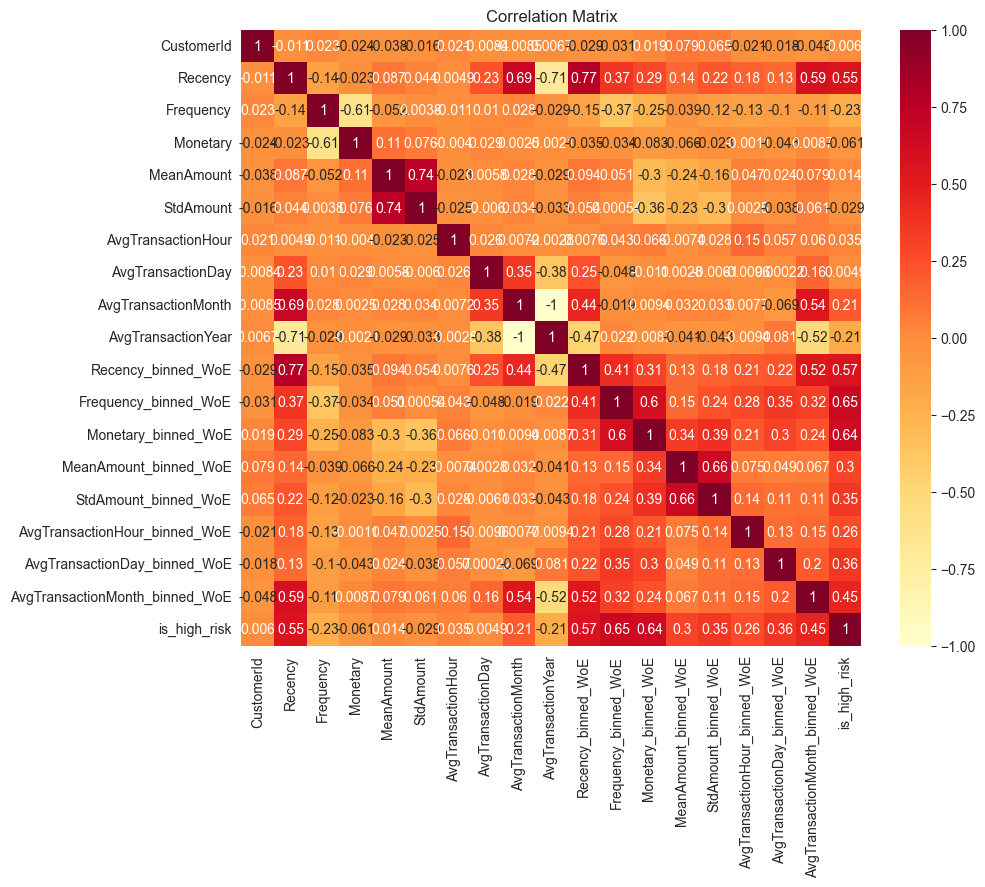

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# Compute the correlation matrix
corr_matrix = df_with_woe.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlOrRd', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [19]:
high_corr_features = corr_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)[corr_matrix.abs().unstack() > 0.8].index.tolist()
high_corr_features

[('CustomerId', 'CustomerId'),
 ('Recency_binned_WoE', 'Recency_binned_WoE'),
 ('Monetary', 'Monetary'),
 ('MeanAmount', 'MeanAmount'),
 ('StdAmount', 'StdAmount'),
 ('AvgTransactionHour', 'AvgTransactionHour'),
 ('AvgTransactionDay', 'AvgTransactionDay'),
 ('AvgTransactionMonth', 'AvgTransactionMonth'),
 ('Frequency_binned_WoE', 'Frequency_binned_WoE'),
 ('Recency', 'Recency'),
 ('Monetary_binned_WoE', 'Monetary_binned_WoE'),
 ('MeanAmount_binned_WoE', 'MeanAmount_binned_WoE'),
 ('StdAmount_binned_WoE', 'StdAmount_binned_WoE'),
 ('AvgTransactionHour_binned_WoE', 'AvgTransactionHour_binned_WoE'),
 ('AvgTransactionDay_binned_WoE', 'AvgTransactionDay_binned_WoE'),
 ('AvgTransactionMonth_binned_WoE', 'AvgTransactionMonth_binned_WoE'),
 ('Frequency', 'Frequency'),
 ('AvgTransactionYear', 'AvgTransactionYear'),
 ('is_high_risk', 'is_high_risk'),
 ('AvgTransactionYear', 'AvgTransactionMonth'),
 ('AvgTransactionMonth', 'AvgTransactionYear')]

## Selected Features based on Correlation matrix

In [20]:
df_with_woe.columns

Index(['CustomerId', 'Recency', 'Frequency', 'Monetary', 'MeanAmount',
       'StdAmount', 'AvgTransactionHour', 'AvgTransactionDay',
       'AvgTransactionMonth', 'AvgTransactionYear', 'Recency_binned_WoE',
       'Frequency_binned_WoE', 'Monetary_binned_WoE', 'MeanAmount_binned_WoE',
       'StdAmount_binned_WoE', 'AvgTransactionHour_binned_WoE',
       'AvgTransactionDay_binned_WoE', 'AvgTransactionMonth_binned_WoE',
       'is_high_risk'],
      dtype='object')

In [22]:
selected_features_df = df_with_woe.drop(['CustomerId', 'Recency', 'Frequency', 'Monetary', 'MeanAmount',
       'StdAmount', 'AvgTransactionHour', 'AvgTransactionDay',
       'AvgTransactionMonth', 'AvgTransactionYear',], axis=1)

In [23]:
selected_features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3021 entries, 2 to 3722
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Recency_binned_WoE              3021 non-null   float64
 1   Frequency_binned_WoE            3021 non-null   float64
 2   Monetary_binned_WoE             3021 non-null   float64
 3   MeanAmount_binned_WoE           3021 non-null   float64
 4   StdAmount_binned_WoE            3021 non-null   float64
 5   AvgTransactionHour_binned_WoE   3021 non-null   float64
 6   AvgTransactionDay_binned_WoE    3021 non-null   float64
 7   AvgTransactionMonth_binned_WoE  3021 non-null   float64
 8   is_high_risk                    3021 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 224.2 KB


## Save the the processed dataset

In [24]:
# Define output folder and file name
output_folder = os.path.join('..', 'data', 'featured')
filename = 'featured_df.parquet'

output_path = save_data(selected_features_df, output_folder, filename)

Dataset saved to ..\data\featured\featured_df.parquet
